# OpenWeather Project


## 1. Introduction

# Import Libraries #

In [2]:
from datasets import load_dataset
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# Load the Dataset and Data Overview #

In [3]:
# Load the dataset

ds = load_dataset("LaurentiuStancioiu/Cluj-Napoca-Weather-OpenWeather-data")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
# Convert the dataset to a pandas DataFrame
df_weather = pd.DataFrame(ds['train'])

# Save to a CSV file
# df_weather.to_csv("Cluj-Napoca-Weather.csv")

# Display the dataset
df_weather

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1199145600,2008-01-01 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,1199149200,2008-01-01 01:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,1199152800,2008-01-01 02:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,1199156400,2008-01-01 03:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,1199160000,2008-01-01 04:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,12.61,10000.0,4.57,11.44,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139390,1682971200,2023-05-01 20:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.61,10000.0,5.58,9.58,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139391,1682974800,2023-05-01 21:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.07,10000.0,6.04,9.12,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139392,1682978400,2023-05-01 22:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,9.80,10000.0,6.70,9.80,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


In [5]:
# Dataset Overview
df = df_weather  # Make a copy of df_weather

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139394 entries, 0 to 139393
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   139394 non-null  int64  
 1   dt_iso               139394 non-null  object 
 2   timezone             139394 non-null  int64  
 3   city_name            139394 non-null  object 
 4   lat                  139394 non-null  float64
 5   lon                  139394 non-null  float64
 6   temp                 139394 non-null  float64
 7   visibility           137498 non-null  float64
 8   dew_point            139391 non-null  float64
 9   feels_like           139394 non-null  float64
 10  temp_min             139394 non-null  float64
 11  temp_max             139394 non-null  float64
 12  pressure             139394 non-null  int64  
 13  sea_level            0 non-null       object 
 14  grnd_level           0 non-null       object 
 15  humidity         

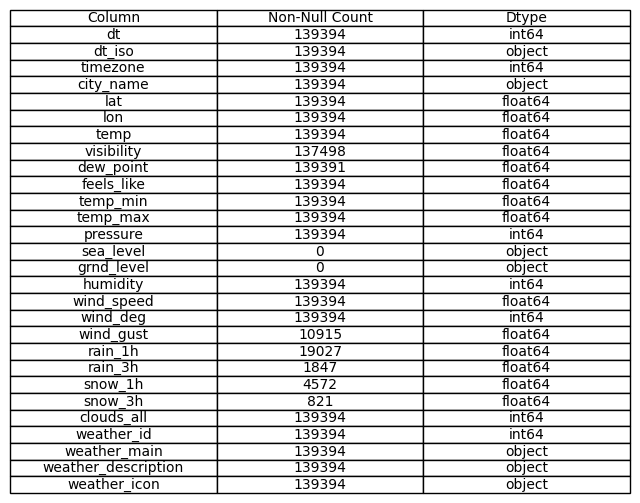

In [6]:
# Better visualize the df.info()

# Extract the df.info() information manually
info = []

for col in df.columns:
    non_null_count = df[col].notnull().sum()
    dtype = df[col].dtype
    info.append([col, non_null_count, dtype])

# Create a DataFrame from the extracted info
df_info = pd.DataFrame(info, columns=["Column", "Non-Null Count", "Dtype"])

# Plotting the DataFrame as a table
plt.figure(figsize=(8, 3))  # Adjust the figure size for better readability
plt.axis('off')  # Turn off the axes

# Create the table and add it to the plot
plt.table(cellText=df_info.values, colLabels=df_info.columns, cellLoc='center', loc='center')
plt.savefig("data_overview.png", bbox_inches='tight')
plt.show()

# Data Cleaning and Preparation #

In [7]:
# Step 1: Check if there are any duplicate rows
has_duplicates = df.duplicated().any()
print(f"Are there any duplicates? {has_duplicates}")

Are there any duplicates? False


Comment: From the above overview, we can see that, *sea_level* and *grnd_level* only have null values, so we drop those two columns in the next step.

In [8]:
# Step 2: Drop column "sea_level" and "grnd_level"

df = df.drop(columns=['sea_level', 'grnd_level'])


# Display the result
df

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1199145600,2008-01-01 00:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.46,4000.0,-10.40,-9.46,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,1199149200,2008-01-01 01:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,1199152800,2008-01-01 02:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.39,4000.0,-10.33,-9.39,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,1199156400,2008-01-01 03:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.49,-9.55,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,1199160000,2008-01-01 04:00:00 +0000 UTC,7200,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,-9.55,4000.0,-10.37,-9.55,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,1682967600,2023-05-01 19:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,12.61,10000.0,4.57,11.44,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139390,1682971200,2023-05-01 20:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.61,10000.0,5.58,9.58,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139391,1682974800,2023-05-01 21:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,10.07,10000.0,6.04,9.12,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139392,1682978400,2023-05-01 22:00:00 +0000 UTC,10800,Universitatea Babeș-Bolyai din Cluj-Napoca,46.767141,23.592139,9.80,10000.0,6.70,9.80,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


In [9]:
# Step 3: Check unique values for each feature
unique_counts = {column: df[column].nunique() for column in df.columns}
unique_counts

{'dt': 134400,
 'dt_iso': 134400,
 'timezone': 2,
 'city_name': 1,
 'lat': 1,
 'lon': 1,
 'temp': 4979,
 'visibility': 67,
 'dew_point': 4035,
 'feels_like': 5348,
 'temp_min': 4807,
 'temp_max': 4706,
 'pressure': 68,
 'humidity': 94,
 'wind_speed': 535,
 'wind_deg': 329,
 'wind_gust': 95,
 'rain_1h': 422,
 'rain_3h': 42,
 'snow_1h': 156,
 'snow_3h': 17,
 'clouds_all': 101,
 'weather_id': 34,
 'weather_main': 12,
 'weather_description': 36,
 'weather_icon': 18}

Comment: From the above list, we can see that, *city_name*, *lat*, *lon* columns only have one unique value, so they won't contribute to our analysis, and we drop these three columns in the next step. Since we wont' use *dt* directly for our analysis, we also drop this column.

In [10]:
# Drop column "city_name", "lat", "lon", and "dt"

df = df.drop(columns=['city_name', 'lat',  'lon', 'dt'])


# Display the result
df

,dt_iso,timezone,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2008-01-01 00:00:00 +0000 UTC,7200,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,92,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,2008-01-01 01:00:00 +0000 UTC,7200,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,92,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,2008-01-01 02:00:00 +0000 UTC,7200,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,92,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,2008-01-01 03:00:00 +0000 UTC,7200,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,92,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,2008-01-01 04:00:00 +0000 UTC,7200,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,93,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,2023-05-01 19:00:00 +0000 UTC,10800,12.61,10000.0,4.57,11.44,12.04,13.42,1019,58,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139390,2023-05-01 20:00:00 +0000 UTC,10800,10.61,10000.0,5.58,9.58,9.85,11.83,1019,71,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139391,2023-05-01 21:00:00 +0000 UTC,10800,10.07,10000.0,6.04,9.12,8.59,11.83,1019,76,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139392,2023-05-01 22:00:00 +0000 UTC,10800,9.80,10000.0,6.70,9.80,7.48,11.83,1020,81,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


In [11]:
# Step 4: Create a "date" column and "time" column based on "dt_iso" and "timezone"

# Parse dt_iso to datetime (ignoring the "+0000 UTC" part initially)
df['dt_iso'] = pd.to_datetime(df['dt_iso'].str.replace(' +0000 UTC', '', regex=False))

# Adjust for timezone
df['dt_iso_local'] = df['dt_iso'] + pd.to_timedelta(df['timezone'], unit='s')

# Extract day of the year and hour
df['date'] = df['dt_iso_local'].dt.dayofyear  # Day of the year (1-365/366)
df['time'] = df['dt_iso_local'].dt.hour       # Hour of the day (0-23)

# Relocate columns
cols_to_move = ['dt_iso_local', 'date', 'time']  # Columns to move to the front
remaining_cols = [col for col in df.columns if col not in cols_to_move + ['dt_iso', 'timezone']]  # Keep other columns
df = df[cols_to_move + remaining_cols]  # Reorder the DataFrame

# Display the resulting DataFrame
df

,dt_iso_local,date,time,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2008-01-01 02:00:00,1,2,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
1,2008-01-01 03:00:00,1,3,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
2,2008-01-01 04:00:00,1,4,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,...,NaN,NaN,NaN,NaN,NaN,100,600,Snow,light snow,13n
3,2008-01-01 05:00:00,1,5,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,...,NaN,NaN,NaN,NaN,0.1,100,804,Clouds,overcast clouds,04n
4,2008-01-01 06:00:00,1,6,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,...,NaN,NaN,NaN,NaN,NaN,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,2023-05-01 22:00:00,121,22,12.61,10000.0,4.57,11.44,12.04,13.42,1019,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139390,2023-05-01 23:00:00,121,23,10.61,10000.0,5.58,9.58,9.85,11.83,1019,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139391,2023-05-02 00:00:00,122,0,10.07,10000.0,6.04,9.12,8.59,11.83,1019,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n
139392,2023-05-02 01:00:00,122,1,9.80,10000.0,6.70,9.80,7.48,11.83,1020,...,NaN,NaN,NaN,NaN,NaN,0,800,Clear,sky is clear,01n


In [12]:
# Step 5: Handling missing data

df.isna().sum()  # Check for missing counts

,0
dt_iso_local,0
date,0
time,0
temp,0
visibility,1896
dew_point,3
feels_like,0
temp_min,0
temp_max,0
pressure,0


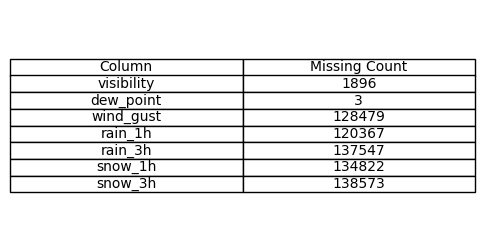

In [13]:
# Better visualize the df.isna().sum() only for features with missing data

# Count missing values per column
missing_counts = df.isna().sum()

# Filter to show only features with missing values
missing_data = missing_counts[missing_counts > 0].reset_index()
missing_data.columns = ['Column', 'Missing Count']  # Rename columns

# Plotting the DataFrame as a table
plt.figure(figsize=(6, 3))  # Adjust the figure size for better readability
plt.axis('off')  # Turn off the axes

# Create the table and add it to the plot
table = plt.table(cellText=missing_data.values, colLabels=missing_data.columns, cellLoc='center', loc='center')
plt.savefig("missing_counts.png", bbox_inches='tight')
plt.show()

In [14]:
# For column "dew_point", "wind_gust", "rain_1h", "rain_3h", "snow_1h" "snow_1h", replace NaN values with median
df = df.copy()
df['dew_point'] = df['dew_point'].fillna(df['dew_point'].median())
df['wind_gust'] = df['wind_gust'].fillna(df['wind_gust'].median())
df['rain_1h'] = df['rain_1h'].fillna(df['rain_1h'].median())
df['rain_3h'] = df['rain_3h'].fillna(df['rain_3h'].median())
df['snow_1h'] = df['snow_1h'].fillna(df['snow_1h'].median())
df['snow_3h'] = df['snow_3h'].fillna(df['snow_3h'].median())

# Display the resulting DataFrame
df

,dt_iso_local,date,time,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2008-01-01 02:00:00,1,2,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,...,0.0,0.0,0.0,0.0,0.0,100,600,Snow,light snow,13n
1,2008-01-01 03:00:00,1,3,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,...,0.0,0.0,0.0,0.0,0.0,100,600,Snow,light snow,13n
2,2008-01-01 04:00:00,1,4,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,...,0.0,0.0,0.0,0.0,0.0,100,600,Snow,light snow,13n
3,2008-01-01 05:00:00,1,5,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,...,0.0,0.0,0.0,0.0,0.1,100,804,Clouds,overcast clouds,04n
4,2008-01-01 06:00:00,1,6,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,...,0.0,0.0,0.0,0.0,0.0,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,2023-05-01 22:00:00,121,22,12.61,10000.0,4.57,11.44,12.04,13.42,1019,...,0.0,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear,01n
139390,2023-05-01 23:00:00,121,23,10.61,10000.0,5.58,9.58,9.85,11.83,1019,...,0.0,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear,01n
139391,2023-05-02 00:00:00,122,0,10.07,10000.0,6.04,9.12,8.59,11.83,1019,...,0.0,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear,01n
139392,2023-05-02 01:00:00,122,1,9.80,10000.0,6.70,9.80,7.48,11.83,1020,...,0.0,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear,01n


In [15]:
# Handling missing values of column "visibility"

# Calculate the mean visibility for each weather_description
visibility_means = df.groupby('weather_description')['visibility'].mean()

# Fill missing visibility values using the mean of the respective weather_description
df['visibility'] = df['visibility'].fillna(
    df['weather_description'].map(visibility_means)
)

# Display the resulting DataFrame
df

,dt_iso_local,date,time,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2008-01-01 02:00:00,1,2,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,...,0.0,0.0,0.0,0.0,0.0,100,600,Snow,light snow,13n
1,2008-01-01 03:00:00,1,3,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,...,0.0,0.0,0.0,0.0,0.0,100,600,Snow,light snow,13n
2,2008-01-01 04:00:00,1,4,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,...,0.0,0.0,0.0,0.0,0.0,100,600,Snow,light snow,13n
3,2008-01-01 05:00:00,1,5,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,...,0.0,0.0,0.0,0.0,0.1,100,804,Clouds,overcast clouds,04n
4,2008-01-01 06:00:00,1,6,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,...,0.0,0.0,0.0,0.0,0.0,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,2023-05-01 22:00:00,121,22,12.61,10000.0,4.57,11.44,12.04,13.42,1019,...,0.0,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear,01n
139390,2023-05-01 23:00:00,121,23,10.61,10000.0,5.58,9.58,9.85,11.83,1019,...,0.0,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear,01n
139391,2023-05-02 00:00:00,122,0,10.07,10000.0,6.04,9.12,8.59,11.83,1019,...,0.0,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear,01n
139392,2023-05-02 01:00:00,122,1,9.80,10000.0,6.70,9.80,7.48,11.83,1020,...,0.0,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear,01n


In [16]:
df.isna().sum()  # Check again for missing counts

,0
dt_iso_local,0
date,0
time,0
temp,0
visibility,0
dew_point,0
feels_like,0
temp_min,0
temp_max,0
pressure,0


In [17]:
df.describe() # Data summary statistics

,dt_iso_local,date,time,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id
count,139394,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000,139394.000000
mean,2015-08-26 03:38:29.806735104,180.402126,11.479655,9.618191,8702.795644,5.084552,8.529267,8.327400,12.116846,1016.121605,75.657396,2.390518,154.977940,0.393990,0.082628,0.024641,0.011844,0.005351,38.215605,728.715253
min,2008-01-01 02:00:00,1.000000,0.000000,-9998.770000,49.000000,-24.390000,-10005.770000,-9998.960000,-275.450000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,2011-10-25 13:15:00,86.000000,5.000000,2.240000,9999.000000,-0.450000,0.690000,0.840000,4.700000,1012.000000,62.000000,1.030000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,701.000000
50%,2015-08-23 19:30:00,179.000000,11.000000,9.700000,10000.000000,5.150000,8.800000,8.450000,12.000000,1016.000000,81.000000,2.000000,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,2019-06-20 22:45:00,274.000000,17.000000,16.910000,10000.000000,11.350000,16.700000,15.750000,19.400000,1021.000000,93.000000,3.100000,270.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,801.000000
max,2023-05-02 02:00:00,366.000000,23.000000,37.610000,10000.000000,25.190000,37.740000,37.000000,42.700000,1044.000000,100.000000,9999.000000,360.000000,24.200000,18.000000,27.000000,2.280000,9.000000,100.000000,804.000000
std,NaN,106.883893,6.927780,47.385004,2730.240737,7.568567,47.556514,47.396329,9.727896,8.178444,19.817223,26.828828,117.502033,1.668262,0.384762,0.408765,0.084294,0.109836,38.417129,121.070155


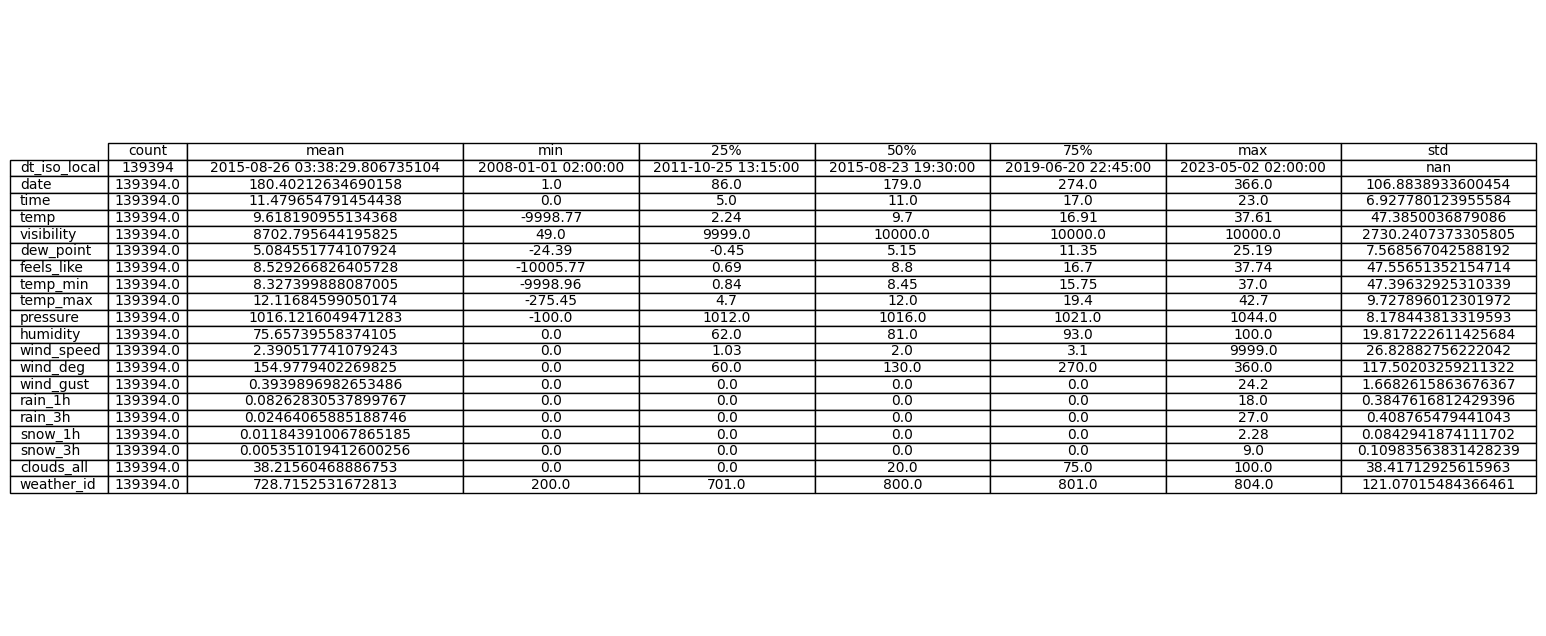

In [18]:
# Better visualize the df.describe()

# Get the summary statistics using df.describe() and transpose it
summary_stats = df.describe().transpose()

# Plotting the DataFrame as a table
plt.figure(figsize=(10, 8))  # Adjust the figure size for better readability
plt.axis('off')  # Turn off the axes

# Create the table and add it to the plot
table = plt.table(cellText=summary_stats.values,
                  colLabels=summary_stats.columns,
                  rowLabels=summary_stats.index,
                  cellLoc='center',
                  loc='center')

# Automatically adjust font size and column width for better fit
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(summary_stats.columns))))

# Save the table as a PNG image
plt.savefig("summary_statistics.png", bbox_inches='tight')
plt.show()

In [ ]:
# Visualizing outliers to validate removal:
sns.boxplot(data=df[numeric_cols])
plt.show()

In [19]:
# Step 6: Detecting outliers for all numeric columns using IQR (Inter Quartile Range)

# Define the numeric columns
numeric_cols = ['temp', 'visibility', 'dew_point', 'feels_like', 'temp_min',
                'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg',
                'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all']

# Detect outliers using IQR for the defined numeric columns
def detect_outliers_iqr(df, numeric_cols):
    outliers = {}  # Dictionary to store outliers for each column

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

        print(f"Column: {col}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Outliers:\n{outliers[col]}\n")

    return outliers

# Call the function with the numeric columns
outliers = detect_outliers_iqr(df, numeric_cols)

Column: temp
Lower Bound: -19.765, Upper Bound: 38.915
Outliers:
37292      -19.90
37293      -20.31
37294      -20.98
37295      -21.34
37296      -21.40
37297      -21.21
37315      -19.94
37316      -20.76
37317      -21.43
37318      -21.74
37319      -21.84
37320      -22.53
37321      -22.61
37322      -21.89
37323      -21.89
37340      -19.82
37341      -19.82
37342      -20.65
37343      -21.45
37344      -21.90
37345      -22.37
37346      -22.59
37347      -23.02
37348      -22.28
37524      -20.14
64114      -20.09
138339   -9998.77
138604   -9998.77
138804   -9998.77
Name: temp, dtype: float64

Column: visibility
Lower Bound: 9997.5, Upper Bound: 10001.5
Outliers:
0         4000.0
1         4000.0
2         4000.0
3         4000.0
4         4000.0
           ...  
139227    3600.0
139228    7000.0
139229    5000.0
139230    3000.0
139231    5000.0
Name: visibility, Length: 30941, dtype: float64

Column: dew_point
Lower Bound: -18.15, Upper Bound: 29.049999999999997
Outlier

Comment: Combine the data summary statistics and outliers results, we identify that 'temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'wind_speed' have unplausible values. Although there are many more outliers according to the IQR method, since they are very close to up/lower bound, or within a reasonable range, we don't simply drop them but instead, we analyze them further to determine their impact on the model's performance and treating them using data scaling.

In [20]:
# Define the conditions for implausible values
conditions = (
    (df['temp'] < -50) | (df['temp'] > 50) |
    (df['feels_like'] < -50) | (df['feels_like'] > 50) |
    (df['temp_min'] < -50) | (df['temp_min'] > 50) |
    (df['temp_max'] < -50) | (df['temp_max'] > 50) |
    (df['pressure'] < 900) |
    (df['wind_speed'] > 100)
)

# Count how many rows need to be dropped
rows_to_drop_count = conditions.sum()
print(f"Number of rows to drop: {rows_to_drop_count}")

# Identify the rows that need to be dropped
rows_to_drop = df[conditions]
print("Rows to drop:")
print(rows_to_drop)

Number of rows to drop: 3
Rows to drop:
              dt_iso_local  date  time     temp   visibility  dew_point  \
138339 2023-03-20 17:00:00    79    17 -9998.77  9923.756375        0.0   
138604 2023-03-31 17:00:00    90    17 -9998.77  9849.074209        0.0   
138804 2023-04-07 13:00:00    97    13 -9998.77  9270.674832        0.0   

        feels_like  temp_min  temp_max  pressure  ...  wind_gust  rain_1h  \
138339    -9998.77  -9998.96   -275.45      -100  ...        0.0      0.0   
138604   -10005.77  -9998.96   -275.45      1008  ...        0.0      0.0   
138804    -9998.77  -9998.96   -275.45      1016  ...        0.0      0.0   

        rain_3h  snow_1h  snow_3h  clouds_all  weather_id  weather_main  \
138339      0.0      0.0      0.0           0         800         Clear   
138604      0.0      0.0      0.0          40         802        Clouds   
138804      0.0      0.0      0.0         100         804        Clouds   

        weather_description  weather_icon  
13833

In [21]:
# Drop the above rows
df_cleaned = df[~conditions]

# Display the resulting DataFrame
df_cleaned

,dt_iso_local,date,time,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2008-01-01 02:00:00,1,2,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,...,0.0,0.0,0.0,0.0,0.0,100,600,Snow,light snow,13n
1,2008-01-01 03:00:00,1,3,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,...,0.0,0.0,0.0,0.0,0.0,100,600,Snow,light snow,13n
2,2008-01-01 04:00:00,1,4,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,...,0.0,0.0,0.0,0.0,0.0,100,600,Snow,light snow,13n
3,2008-01-01 05:00:00,1,5,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,...,0.0,0.0,0.0,0.0,0.1,100,804,Clouds,overcast clouds,04n
4,2008-01-01 06:00:00,1,6,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,...,0.0,0.0,0.0,0.0,0.0,100,701,Mist,mist,50n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,2023-05-01 22:00:00,121,22,12.61,10000.0,4.57,11.44,12.04,13.42,1019,...,0.0,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear,01n
139390,2023-05-01 23:00:00,121,23,10.61,10000.0,5.58,9.58,9.85,11.83,1019,...,0.0,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear,01n
139391,2023-05-02 00:00:00,122,0,10.07,10000.0,6.04,9.12,8.59,11.83,1019,...,0.0,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear,01n
139392,2023-05-02 01:00:00,122,1,9.80,10000.0,6.70,9.80,7.48,11.83,1020,...,0.0,0.0,0.0,0.0,0.0,0,800,Clear,sky is clear,01n


# Data Visualization #

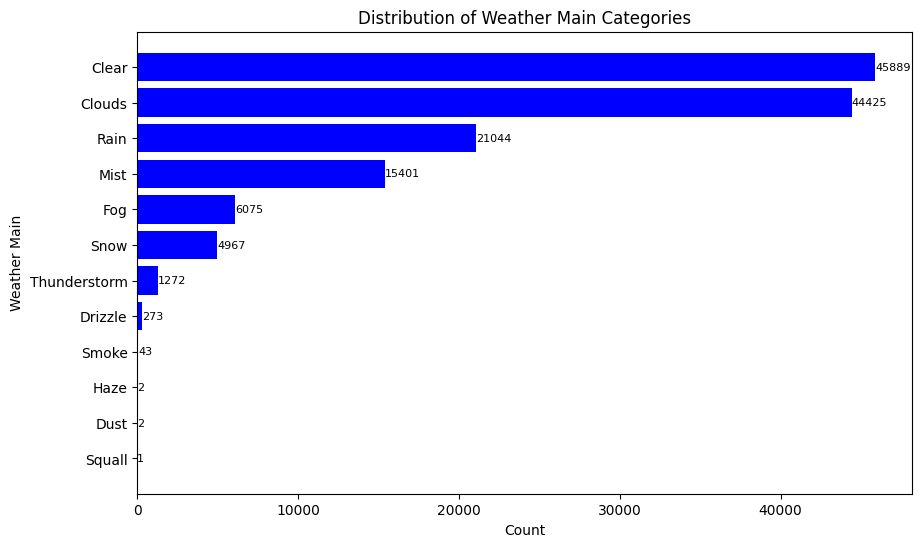

In [22]:
# 1. Plot horizontal bar chart for the target feature 'weather_main'

# Count the occurrences of each category and sort in descending order
weather_main_counts = df['weather_main'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(weather_main_counts.index, weather_main_counts.values, color='blue')

# Annotate each bar with the count
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             str(int(bar.get_width())), va='center', fontsize=8)

# Customize the chart
plt.xlabel('Count')
plt.ylabel('Weather Main')
plt.title('Distribution of Weather Main Categories')
plt.gca().invert_yaxis()  # Invert y-axis to display the largest count at the top
plt.savefig('weather_main_barchart.png', dpi=300)
plt.show()

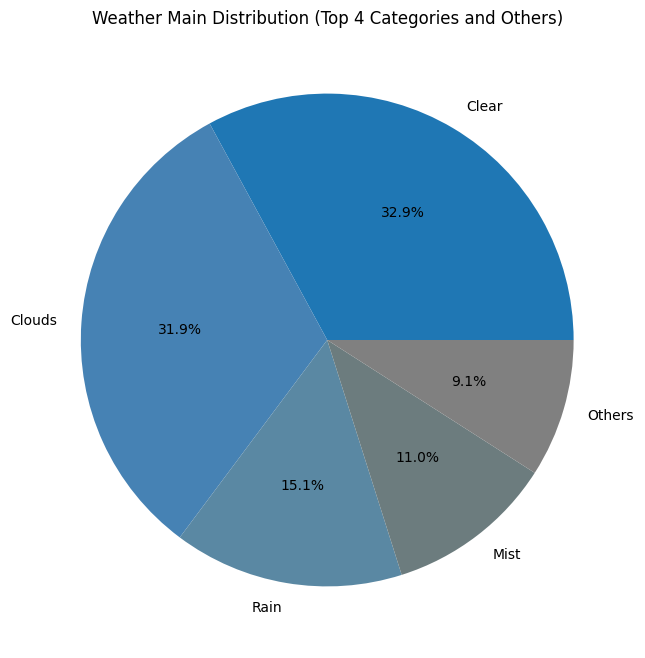

In [23]:
# 2. Plot pie chart for the target feature 'weather_main'

# Separate top 4 categories and group the rest as 'Others'
top_categories = weather_main_counts.head(4)  # Top 4 categories
others_count = weather_main_counts[4:].sum()  # Sum of all other categories

# Combine the top categories with 'Others'
pie_data = pd.concat([top_categories, pd.Series({'Others': others_count})])

# Define colors with a blue/grey theme
colors = ['#1f77b4', '#4682b4', '#5a88a3', '#6c7c7e', 'grey']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    pie_data,
    labels=pie_data.index,
    autopct='%1.1f%%',  # Display percentages
    colors=colors,  # Assign colors, grey for "Others"
    explode=[0] * len(pie_data)  # No separation of pie pieces
)

# Customize the chart
plt.title('Weather Main Distribution (Top 4 Categories and Others)')
plt.savefig('weather_main_piechart.png', dpi=300)
plt.show()

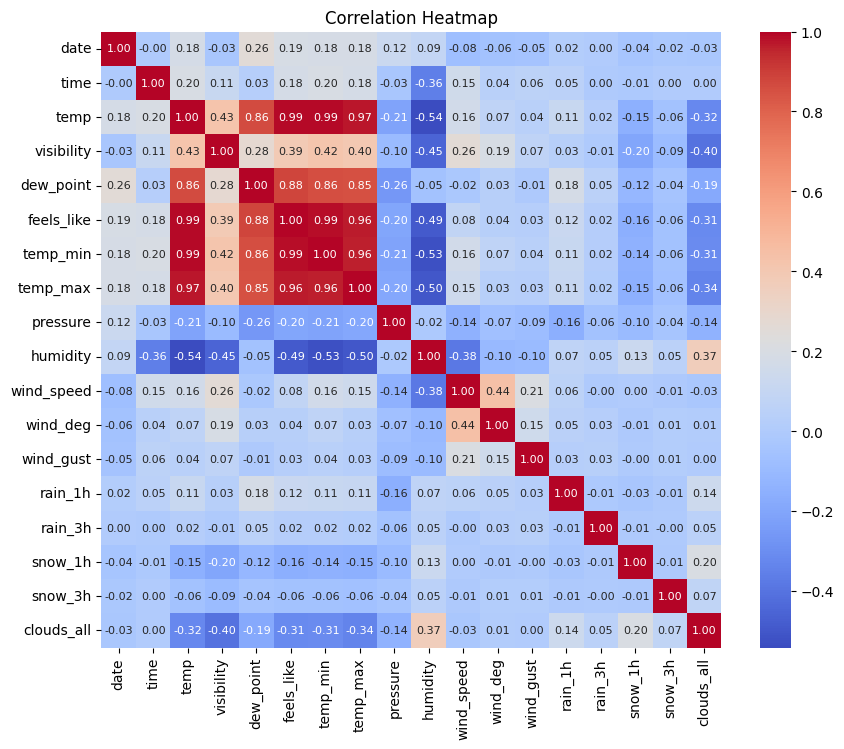

In [24]:
# 3. Plot heatmap for all input (numeric) features

# List input columns
input_cols = ['date', 'time', 'temp', 'visibility', 'dew_point', 'feels_like', 'temp_min',
                'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg',
                'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all']

df_input = df_cleaned[input_cols]  # df_input only consists of input columns

corr_input = df_input.corr() # Compute the correlation matrix

plt.figure(figsize=(10, 8))  # Optional: adjust the size of the plot
sns.heatmap(corr_input, annot=True, annot_kws={"size": 8}, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

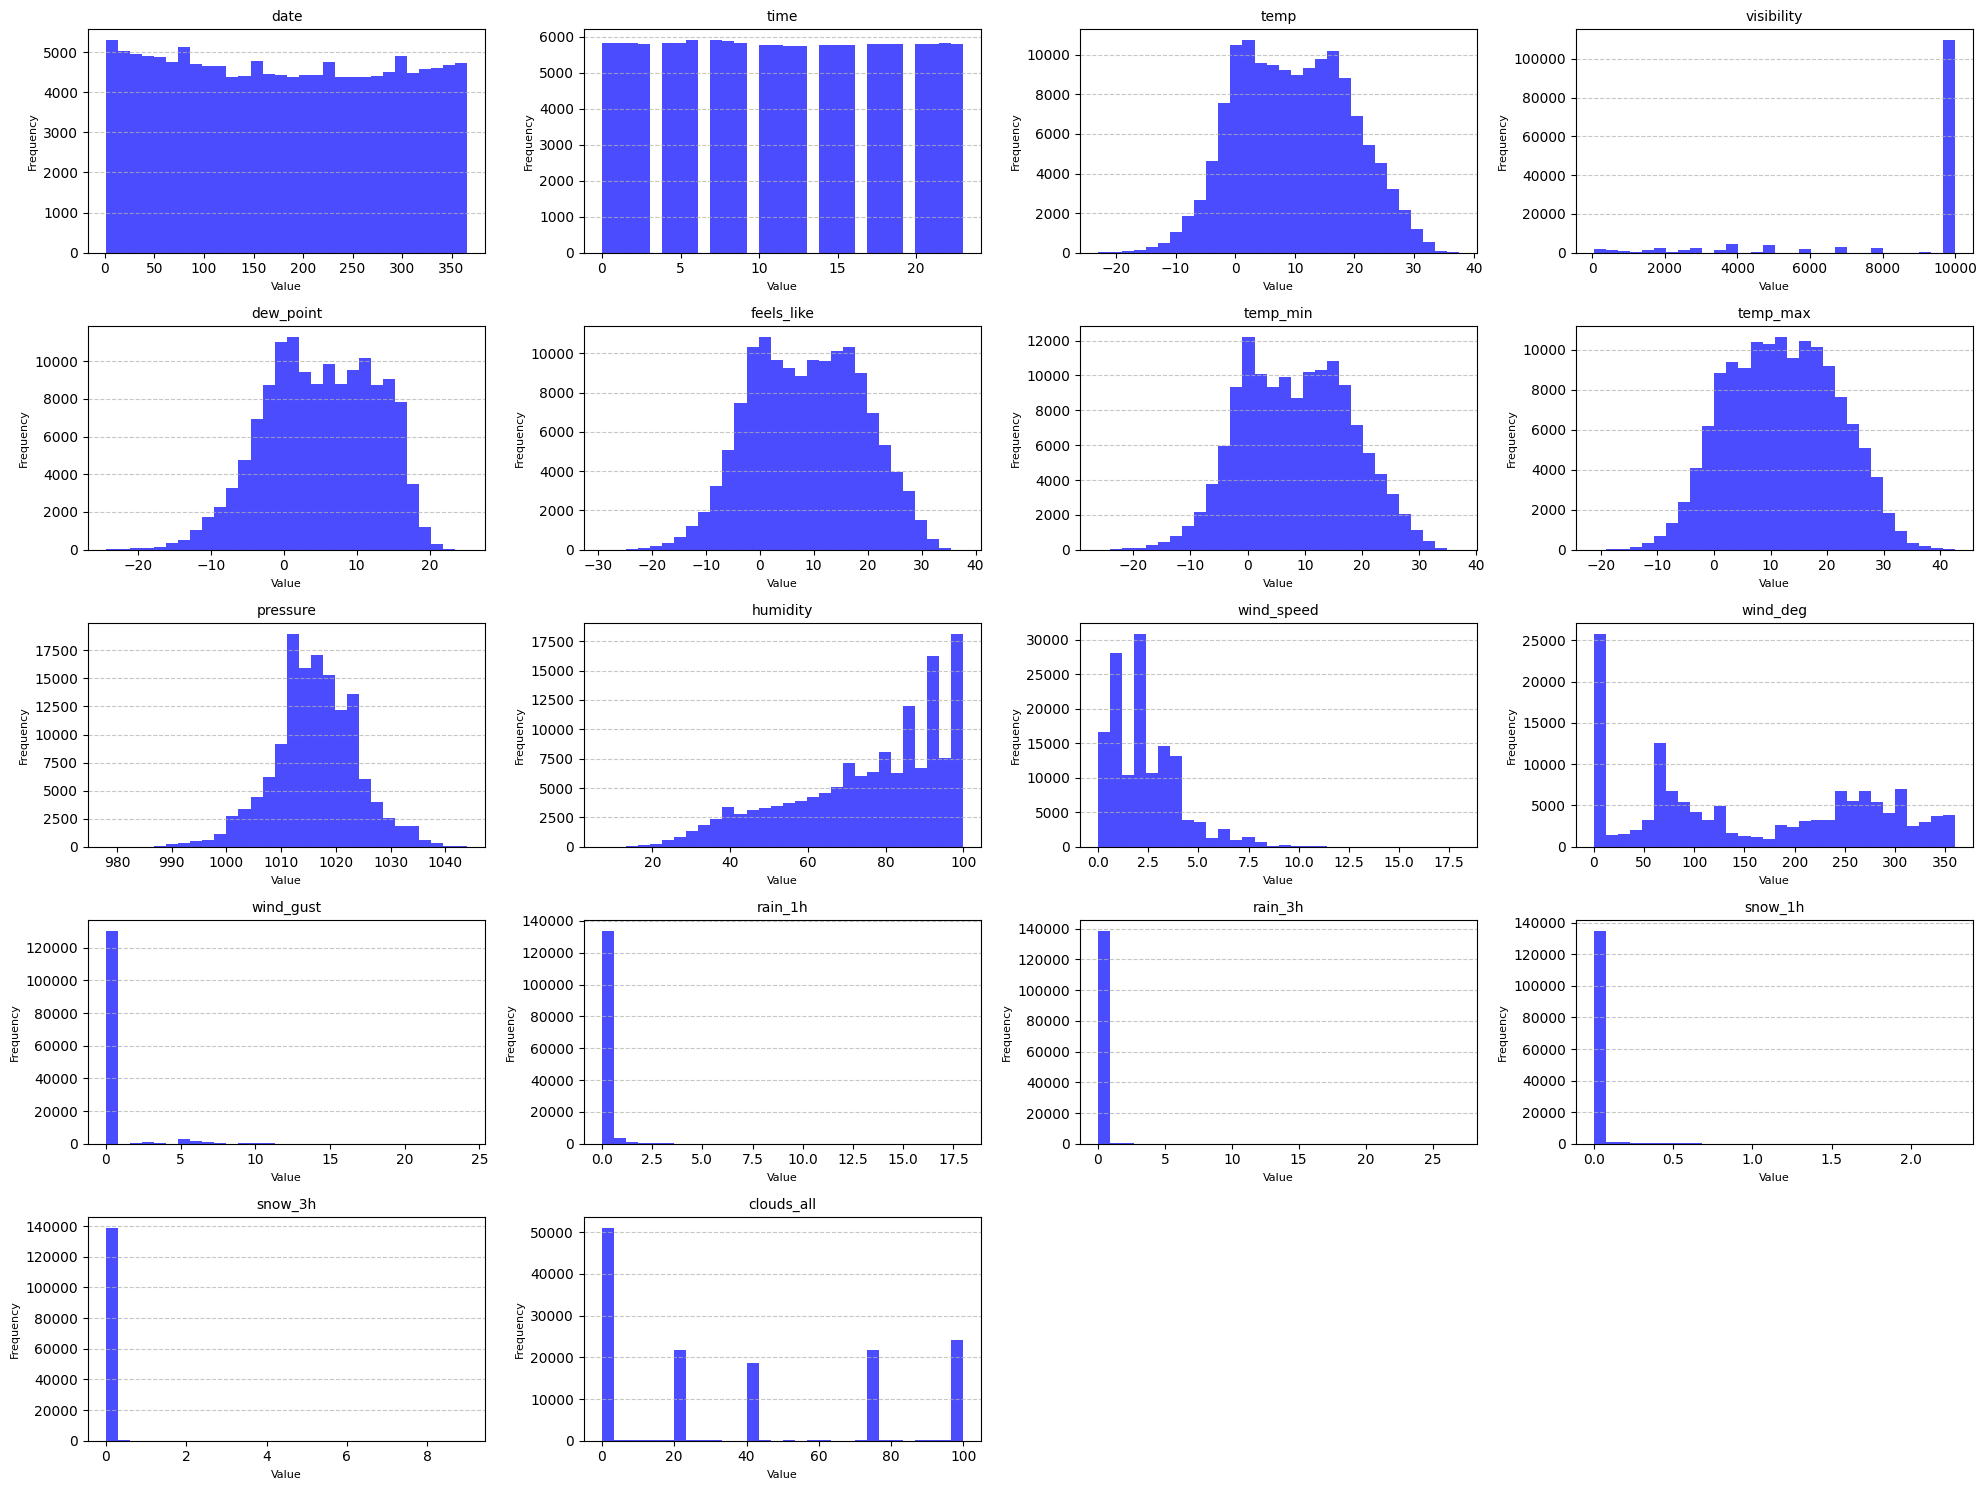

In [25]:
# 4. Plot histograms for all input (numeric) features

plt.figure(figsize=(20, 15))  # Adjust the overall figure size
for i, col in enumerate(df_input.columns, 1):
    plt.subplot(5, 4, i)  # Arrange subplots in a grid (e.g., 5 rows x 4 columns)
    plt.hist(df_input[col].dropna(), bins=30, color='blue', alpha=0.7)  # Drop NaN values for histogram
    plt.title(col, fontsize=10)
    plt.xlabel('Value', fontsize=8)
    plt.ylabel('Frequency', fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('input_columns_histograms.png', dpi=300)
plt.show()

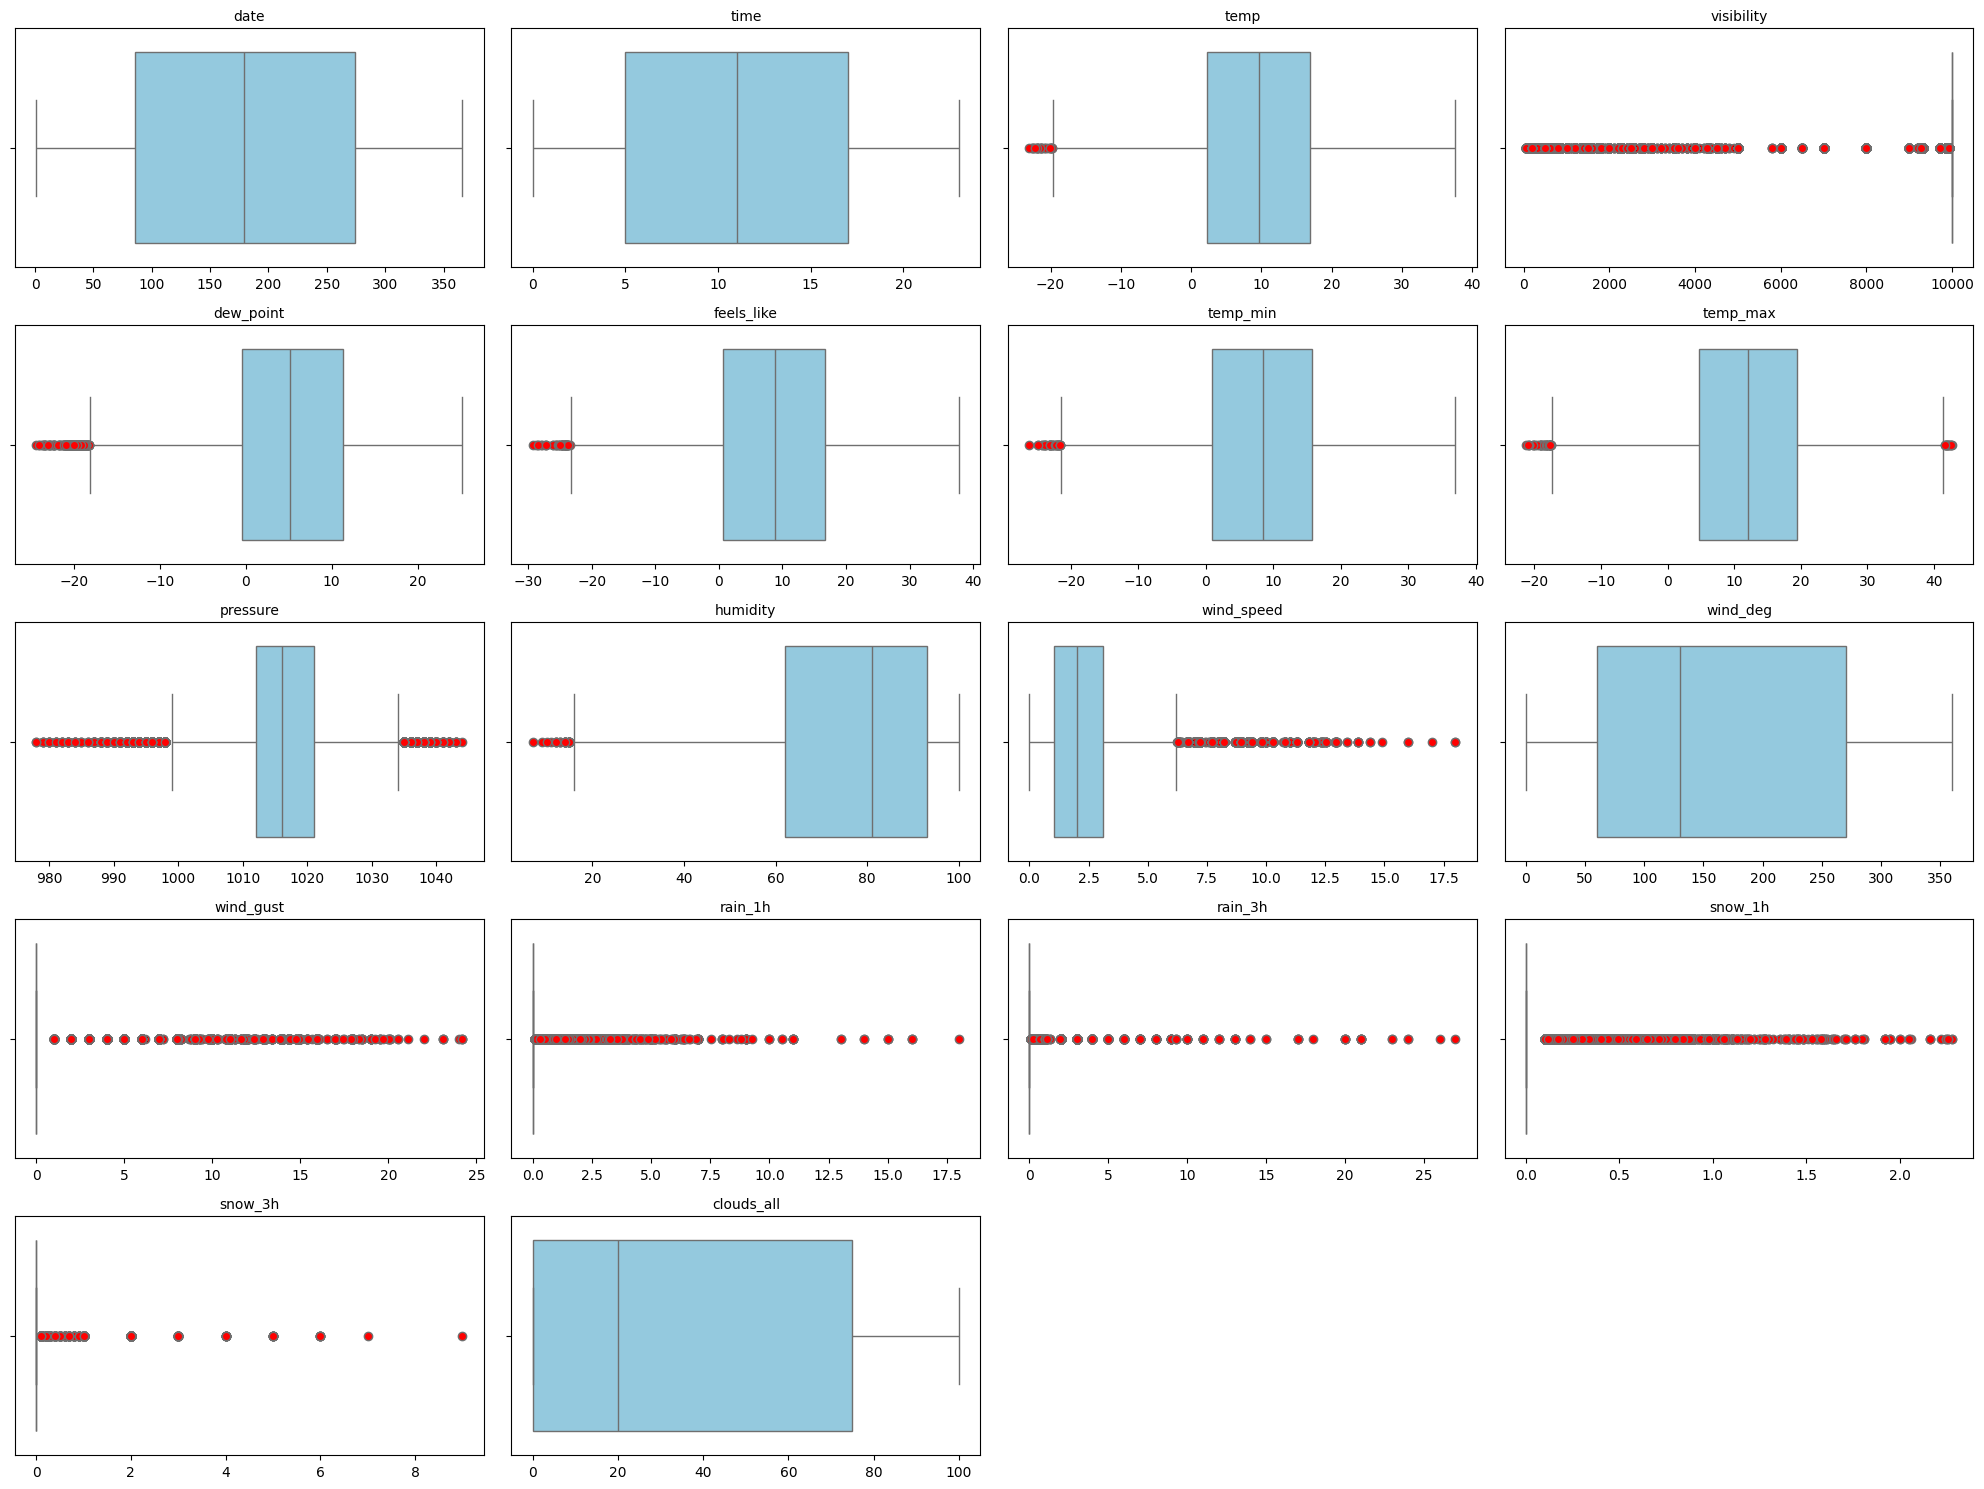

In [26]:
# 5. Plot boxplots for all input (numeric) features

# Create subplots for boxplots
plt.figure(figsize=(20, 15))  # Adjust the figure size
for i, col in enumerate(input_cols, 1):
    plt.subplot(5, 4, i)  # Arrange in a grid (e.g., 5 rows x 4 columns)
    sns.boxplot(x=df_input[col], color='skyblue', flierprops={"markerfacecolor": "red", "marker": "o"})
    # Boxplot for each feature and show outliers in a different color
    plt.title(col, fontsize=10)  # Set title for each subplot
    plt.xlabel('')  # Remove x-axis label to keep it clean

plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('input_columns_boxplots.png', dpi=300)
plt.show()

In [ ]:
# 6. Plot scatter matrix for below features (running time: 5m 58s)

# List matrix columns
matrix_cols = ['temp', 'visibility', 'dew_point',
               'pressure', 'humidity', 'wind_speed', 'wind_deg',
                'wind_gust', 'rain_1h', 'snow_1h', 'clouds_all']

# Create a pairplot for the updated feature list
sns.pairplot(df_cleaned[matrix_cols], diag_kind='kde', plot_kws={'alpha': 0.6})

# Save the figure
plt.savefig('pairplot_adjusted.png', dpi=300)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Data Transformation and Split #

In [27]:
# Step 1: Cyclical transformation for "date" and "time" to better capture seasonal patterns and avoid standardization.
df_trans = df_cleaned.copy()
df_trans['date_sin'] = np.sin(2 * np.pi * df_trans['date'] / 365)
df_trans['date_cos'] = np.cos(2 * np.pi * df_trans['date'] / 365)
df_trans['time_sin'] = np.sin(2 * np.pi * df_trans['time'] / 24)
df_trans['time_cos'] = np.cos(2 * np.pi * df_trans['time'] / 24)

# Display the resulting DataFrame
df_trans

,dt_iso_local,date,time,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,...,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date_sin,date_cos,time_sin,time_cos
0,2008-01-01 02:00:00,1,2,-9.46,4000.0,-10.40,-9.46,-11.37,-7.64,1024,...,0.0,100,600,Snow,light snow,13n,0.017213,0.999852,0.500000,8.660254e-01
1,2008-01-01 03:00:00,1,3,-9.39,4000.0,-10.33,-9.39,-11.50,-7.39,1024,...,0.0,100,600,Snow,light snow,13n,0.017213,0.999852,0.707107,7.071068e-01
2,2008-01-01 04:00:00,1,4,-9.39,4000.0,-10.33,-9.39,-11.68,-7.35,1023,...,0.0,100,600,Snow,light snow,13n,0.017213,0.999852,0.866025,5.000000e-01
3,2008-01-01 05:00:00,1,5,-9.55,4000.0,-10.49,-9.55,-11.74,-7.60,1023,...,0.1,100,804,Clouds,overcast clouds,04n,0.017213,0.999852,0.965926,2.588190e-01
4,2008-01-01 06:00:00,1,6,-9.55,4000.0,-10.37,-9.55,-11.48,-7.85,1023,...,0.0,100,701,Mist,mist,50n,0.017213,0.999852,1.000000,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,2023-05-01 22:00:00,121,22,12.61,10000.0,4.57,11.44,12.04,13.42,1019,...,0.0,0,800,Clear,sky is clear,01n,0.871706,-0.490029,-0.500000,8.660254e-01
139390,2023-05-01 23:00:00,121,23,10.61,10000.0,5.58,9.58,9.85,11.83,1019,...,0.0,0,800,Clear,sky is clear,01n,0.871706,-0.490029,-0.258819,9.659258e-01
139391,2023-05-02 00:00:00,122,0,10.07,10000.0,6.04,9.12,8.59,11.83,1019,...,0.0,0,800,Clear,sky is clear,01n,0.863142,-0.504961,0.000000,1.000000e+00
139392,2023-05-02 01:00:00,122,1,9.80,10000.0,6.70,9.80,7.48,11.83,1020,...,0.0,0,800,Clear,sky is clear,01n,0.863142,-0.504961,0.258819,9.659258e-01


Comment: We use cyclical transformations for date and time instead of standardization because date (e.g., days of the year) and time (e.g., hours of the day) are cyclical in nature. Standardization does not preserve this cyclical relationship.

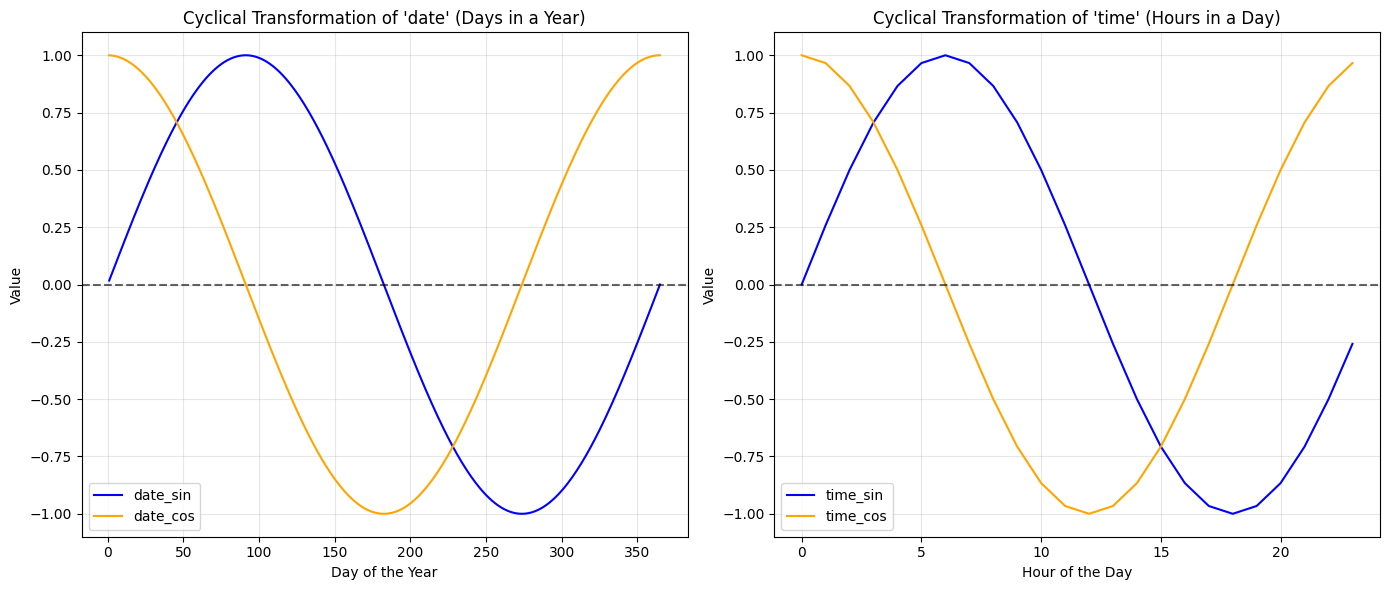

In [28]:
# Visualize Cyclical Transformations

# Create a demonstration DataFrame for "date" (days of the year) and "time" (hours of the day)
days = np.arange(1, 366)  # Days in a year
hours = np.arange(0, 24)  # Hours in a day

# Calculate cyclical transformations
date_sin = np.sin(2 * np.pi * days / 365)
date_cos = np.cos(2 * np.pi * days / 365)
time_sin = np.sin(2 * np.pi * hours / 24)
time_cos = np.cos(2 * np.pi * hours / 24)

# Plotting the cyclical transformations for "date"
plt.figure(figsize=(14, 6))

# Date sine and cosine
plt.subplot(1, 2, 1)
plt.plot(days, date_sin, label='date_sin', color='blue')
plt.plot(days, date_cos, label='date_cos', color='orange')
plt.title("Cyclical Transformation of 'date' (Days in a Year)")
plt.xlabel("Day of the Year")
plt.ylabel("Value")
plt.axhline(0, color='black', linestyle='--', alpha=0.6)
plt.legend()
plt.grid(alpha=0.3)

# Plotting the cyclical transformations for "time"
plt.subplot(1, 2, 2)
plt.plot(hours, time_sin, label='time_sin', color='blue')
plt.plot(hours, time_cos, label='time_cos', color='orange')
plt.title("Cyclical Transformation of 'time' (Hours in a Day)")
plt.xlabel("Hour of the Day")
plt.ylabel("Value")
plt.axhline(0, color='black', linestyle='--', alpha=0.6)
plt.legend()
plt.grid(alpha=0.3)

# Adjust layout and show plots
plt.tight_layout()
plt.savefig('cyclical_transformations.png', dpi=300)
plt.show()

In [29]:
# Step 2: Data standardization

# List input columns that need to be standardized
stand_cols = ['temp', 'visibility', 'dew_point', 'feels_like', 'temp_min',
                'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg',
                'wind_gust', 'rain_1h', 'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all']

# Initialize a StandardScaler
scaler = StandardScaler()

# Apply the scaler to the stand_cols
df_trans[stand_cols] = scaler.fit_transform(df_trans[stand_cols])

# Display the scaled DataFrame
df_trans

,dt_iso_local,date,time,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,...,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date_sin,date_cos,time_sin,time_cos
0,2008-01-01 02:00:00,1,2,-2.039477,-1.722466,-2.045912,-1.774568,-2.086961,-2.050947,1.033867,...,-0.048719,1.608265,600,Snow,light snow,13n,0.017213,0.999852,0.500000,8.660254e-01
1,2008-01-01 03:00:00,1,3,-2.032077,-1.722466,-2.036664,-1.767744,-2.100585,-2.025003,1.033867,...,-0.048719,1.608265,600,Snow,light snow,13n,0.017213,0.999852,0.707107,7.071068e-01
2,2008-01-01 04:00:00,1,4,-2.032077,-1.722466,-2.036664,-1.767744,-2.119450,-2.020852,0.902504,...,-0.048719,1.608265,600,Snow,light snow,13n,0.017213,0.999852,0.866025,5.000000e-01
3,2008-01-01 05:00:00,1,5,-2.048990,-1.722466,-2.057804,-1.783341,-2.125739,-2.046796,0.902504,...,0.861726,1.608265,804,Clouds,overcast clouds,04n,0.017213,0.999852,0.965926,2.588190e-01
4,2008-01-01 06:00:00,1,6,-2.048990,-1.722466,-2.041949,-1.783341,-2.098489,-2.072740,0.902504,...,-0.048719,1.608265,701,Mist,mist,50n,0.017213,0.999852,1.000000,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139389,2023-05-01 22:00:00,121,22,0.293487,0.475130,-0.068000,0.262734,0.366527,0.134595,0.377054,...,-0.048719,-0.994755,800,Clear,sky is clear,01n,0.871706,-0.490029,-0.500000,8.660254e-01
139390,2023-05-01 23:00:00,121,23,0.082072,0.475130,0.065447,0.081424,0.137003,-0.030410,0.377054,...,-0.048719,-0.994755,800,Clear,sky is clear,01n,0.871706,-0.490029,-0.258819,9.659258e-01
139391,2023-05-02 00:00:00,122,0,0.024990,0.475130,0.126224,0.036584,0.004949,-0.030410,0.377054,...,-0.048719,-0.994755,800,Clear,sky is clear,01n,0.863142,-0.504961,0.000000,1.000000e+00
139392,2023-05-02 01:00:00,122,1,-0.003551,0.475130,0.213427,0.102870,-0.111385,-0.030410,0.508416,...,-0.048719,-0.994755,800,Clear,sky is clear,01n,0.863142,-0.504961,0.258819,9.659258e-01


In [30]:
# Step 3: Encode the target column "weather_main"

# Method 1: Label Encoding for tree-based models
label_encoder = LabelEncoder()
df_trans['weather_main_encoded_label'] = label_encoder.fit_transform(df_trans['weather_main'])

# Display the mapping of labels to categories
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:")
for category, label in label_mapping.items():
    print(f"{label}: {category}")

# Method 2: One-Hot Encoding for other models
df_trans_one_hot = pd.get_dummies(df_trans, columns=['weather_main'], drop_first=True)

# Use separate DataFrames if analyzing or modeling with different encodings:
# - `df_trans` with label encoding
# - `df_trans_one_hot` with one-hot encoding

Label Mapping:
0: Clear
1: Clouds
2: Drizzle
3: Dust
4: Fog
5: Haze
6: Mist
7: Rain
8: Smoke
9: Snow
10: Squall
11: Thunderstorm


Time-Based Split (For Time-Dependent Data):

- Use this if your dataset has a temporal structure (e.g., weather data recorded sequentially over time).
- Splitting chronologically ensures that training is done on past data and testing on future data, simulating real-world forecasting scenarios.

In [31]:
# Step 4: Split the dataset into training and test sets using time-based split

# Sort the dataset by time (assuming a 'datetime' column or similar temporal structure exists)
df_trans = df_trans.sort_values(by='dt_iso_local')

# Define the list of columns to drop for the input features
columns_to_drop = ['dt_iso_local', 'date', 'time', 'weather_id', 'weather_main', 'weather_description', 'weather_icon',
                   'weather_main_encoded_label']

# Define a cutoff point (e.g., 80% of data for training)
train_size = int(0.8 * len(df_trans))

# Split into training and test sets
train_data = df_trans.iloc[:train_size]
test_data = df_trans.iloc[train_size:]

X_train, y_train = train_data.drop(columns=columns_to_drop), train_data['weather_main_encoded_label']
X_test, y_test = test_data.drop(columns=columns_to_drop), test_data['weather_main_encoded_label']

print("Training Set Size:", X_train.shape, y_train.shape)
print("Test Set Size:", X_test.shape, y_test.shape)

Training Set Size: (111512, 20) (111512,)
Test Set Size: (27879, 20) (27879,)


# Build Up Initial Models #

## Model 1: Logistic Regression ##

In [32]:
# Initialize Logistic Regression classifier (running time: 18s)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# F1 Score (use 'weighted' for imbalanced classes)
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print metrics
print("Logistic Regression Metrics:")
print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Test Set: {accuracy_test:.4f}")
print(f"F1 Score on Training Set: {f1_train:.4f}")
print(f"F1 Score on Test Set: {f1_test:.4f}")

Logistic Regression Metrics:
Accuracy on Training Set: 0.8697
Accuracy on Test Set: 0.8946
F1 Score on Training Set: 0.8607
F1 Score on Test Set: 0.8887


## Model 2: k-Nearest Neighbors (k-NN)

In [33]:
# Initialize k-NN classifier (running time: 2m 1s)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# F1 Score (use 'weighted' for imbalanced classes)
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print metrics
print("k-NN Metrics:")
print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Test Set: {accuracy_test:.4f}")
print(f"F1 Score on Training Set: {f1_train:.4f}")
print(f"F1 Score on Test Set: {f1_test:.4f}")

k-NN Metrics:
Accuracy on Training Set: 0.8721
Accuracy on Test Set: 0.8054
F1 Score on Training Set: 0.8655
F1 Score on Test Set: 0.7967


## Model 3: Decision Tree ##

In [34]:
# Initialize the DecisionTreeClassifier (running time: 2s)
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# F1 Score (use 'weighted' for imbalanced classes)
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print metrics
print("Decision Tree Metrics:")
print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Test Set: {accuracy_test:.4f}")
print(f"F1 Score on Training Set: {f1_train:.4f}")
print(f"F1 Score on Test Set: {f1_test:.4f}")

Decision Tree Metrics:
Accuracy on Training Set: 0.9628
Accuracy on Test Set: 0.8641
F1 Score on Training Set: 0.9603
F1 Score on Test Set: 0.8660


## Model 4: Random Forest Classifier ##

In [35]:
# Initialize the RandomForestClassifier (running time: 35s)
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# F1 Score (use 'weighted' for imbalanced classes)
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print metrics
print("Random Forest Metrics:")
print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Test Set: {accuracy_test:.4f}")
print(f"F1 Score on Training Set: {f1_train:.4f}")
print(f"F1 Score on Test Set: {f1_test:.4f}")

Random Forest Metrics:
Accuracy on Training Set: 0.9628
Accuracy on Test Set: 0.9288
F1 Score on Training Set: 0.9618
F1 Score on Test Set: 0.9219


In [36]:
# Check the distribution of real and predicted labels
print("Real Class Distribution in Test Set:")
print(pd.Series(y_test).value_counts())

print("Predicted Class Distribution in Test Set:")
print(pd.Series(y_test_pred).value_counts())

Real Class Distribution in Test Set:
weather_main_encoded_label
1     9811
0     9055
7     4396
6     2186
4     1297
9      827
11     210
2       89
8        7
5        1
Name: count, dtype: int64
Predicted Class Distribution in Test Set:
1     10662
0      9137
7      4231
6      2141
4       860
9       847
11        1
Name: count, dtype: int64


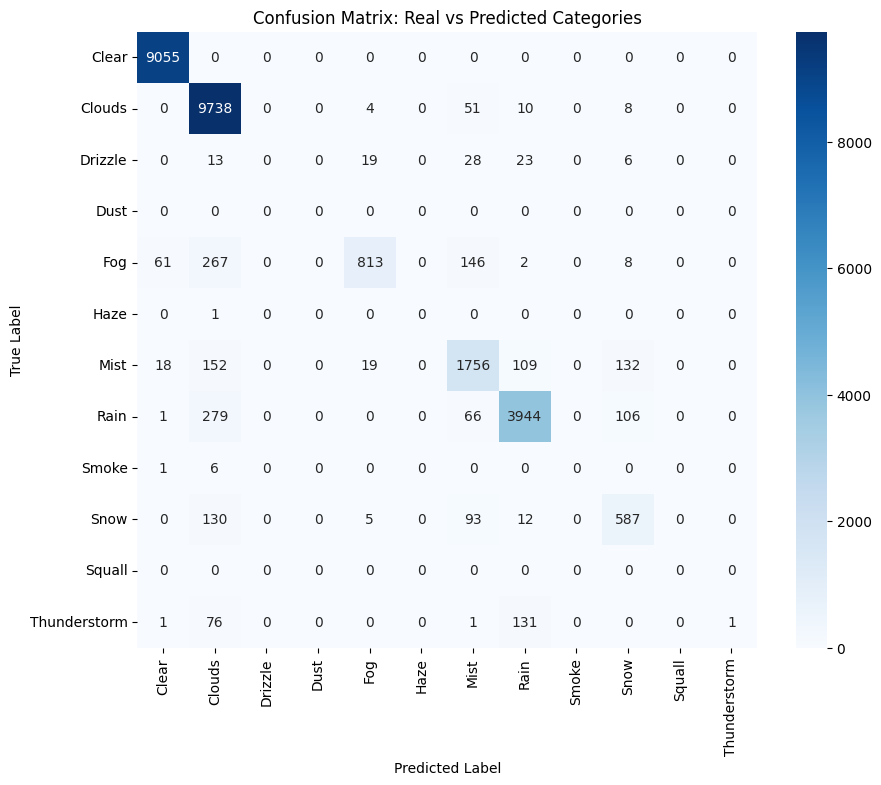

In [37]:
# Plot confusion matrix based on the above random forest model

# Ensure both the test set and predictions have the same set of labels
all_labels = label_encoder.classes_

# Generate confusion matrix with numeric labels
cm = confusion_matrix(y_test, y_test_pred, labels=np.arange(len(all_labels)))

# Inverse transform the numeric labels to categorical labels
y_test_categories = label_encoder.inverse_transform(y_test)
y_test_pred_categories = label_encoder.inverse_transform(y_test_pred)

# Create confusion matrix with categorical labels
cm_categories = confusion_matrix(y_test_categories, y_test_pred_categories, labels=label_encoder.classes_)

# Plot the confusion matrix with categorical labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm_categories, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Real vs Predicted Categories')
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

## Model 5: Gradient Boosting (XGBoost) ##

In [38]:
# Initialize XGBoost classifier (running time: 19s)
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# F1 Score (use 'weighted' for imbalanced classes)
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print metrics
print("XGBoost Metrics:")
print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Test Set: {accuracy_test:.4f}")
print(f"F1 Score on Training Set: {f1_train:.4f}")
print(f"F1 Score on Test Set: {f1_test:.4f}")

XGBoost Metrics:
Accuracy on Training Set: 0.9273
Accuracy on Test Set: 0.9282
F1 Score on Training Set: 0.9235
F1 Score on Test Set: 0.9219


Visualize feature importances for the RandomForestClassifier and XGBClassifier models below

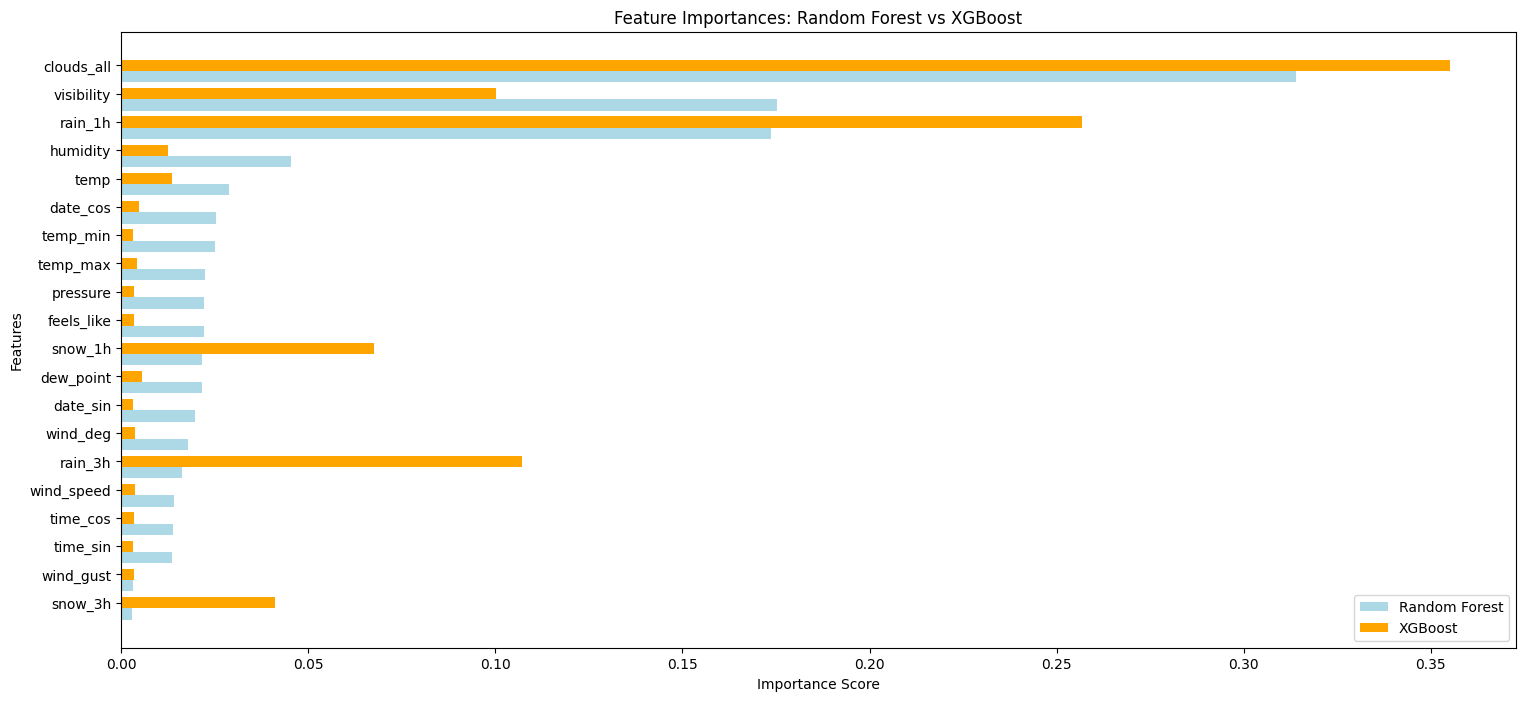

In [39]:
# Extract feature importances from both models
feature_importances = pd.DataFrame({
    'rf': rf.feature_importances_,
    'xgb': xgb_model.feature_importances_
}, index=X_train.columns)

# Sort features by Random Forest importance for consistency
feature_importances.sort_values(by='rf', ascending=True, inplace=True)

# Plotting the feature importances
index = np.arange(len(feature_importances))
fig, ax = plt.subplots(figsize=(18, 8))

# Random Forest
rf_feature = ax.barh(index, feature_importances['rf'], 0.4, color='lightblue', label='Random Forest')

# XGBoost
xgb_feature = ax.barh(index + 0.4, feature_importances['xgb'], 0.4, color='orange', label='XGBoost')

# Labeling the y-axis
ax.set(yticks=index + 0.4, yticklabels=feature_importances.index)

# Add legend
ax.legend()

# Show plot
plt.title("Feature Importances: Random Forest vs XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Model 6: Neural Network (MLPClassifier) ##

In [40]:
# Initialize Multi-Layer Perceptron (Neural Network) (running time: 3m 38s)
mlp = MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=500)

# Train the model
mlp.fit(X_train, y_train)

# Predictions
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# F1 Score (use 'weighted' for imbalanced classes)
f1_train = f1_score(y_train, y_train_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print metrics
print("Multi-Layer Perceptron (Neural Network) Metrics:")
print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Test Set: {accuracy_test:.4f}")
print(f"F1 Score on Training Set: {f1_train:.4f}")
print(f"F1 Score on Test Set: {f1_test:.4f}")

Multi-Layer Perceptron (Neural Network) Metrics:
Accuracy on Training Set: 0.9032
Accuracy on Test Set: 0.9205
F1 Score on Training Set: 0.8973
F1 Score on Test Set: 0.9155


# Improve Random Forest Model #

In [41]:
# Step 1: Get default hyperparameters of the RandomForestClassifier

# Create a RandomForestClassifier instance
rf = RandomForestClassifier(random_state=42)

# Get the default hyperparameters
default_params = rf.get_params()

# Display the default hyperparameters
print("Default hyperparameters of the Random Forest Model")
for param, value in default_params.items():
    print(f"{param}: {value}")

Default hyperparameters of the Random Forest Model
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [44]:
# Step 2: Delete rows with target category counts less than 3 and split the data into new training and test sets

# Filter categories with counts >= 3
category_counts = df_trans['weather_main_encoded_label'].value_counts()
valid_categories = category_counts[category_counts >= 3].index
filtered_df = df_trans[df_trans['weather_main_encoded_label'].isin(valid_categories)]

# Sort by time
filtered_df = filtered_df.sort_values(by='dt_iso_local')

# Time-based split (e.g., 80% for training, 20% for testing)
train_size = int(0.8 * len(filtered_df))

train_data = filtered_df.iloc[:train_size]
test_data = filtered_df.iloc[train_size:]

# Define input features (X) and target (y) for training and test sets
columns_to_drop = ['dt_iso_local', 'date', 'time', 'weather_id', 'weather_main', 'weather_description',
                   'weather_icon', 'weather_main_encoded_label']

X_train_new, y_train_new = train_data.drop(columns=columns_to_drop), train_data['weather_main_encoded_label']
X_test_new, y_test_new = test_data.drop(columns=columns_to_drop), test_data['weather_main_encoded_label']

# Output dataset sizes
print("Original dataset size:", df_trans.shape)
print("Filtered dataset size:", filtered_df.shape)
print("Training Set Size:", X_train_new.shape, y_train_new.shape)
print("Test Set Size:", X_test_new.shape, y_test_new.shape)

Original dataset size: (139391, 28)
Filtered dataset size: (139386, 28)
Training Set Size: (111508, 20) (111508,)
Test Set Size: (27878, 20) (27878,)


In [45]:
print(X_train_new.dtypes)

temp          float64
visibility    float64
dew_point     float64
feels_like    float64
temp_min      float64
temp_max      float64
pressure      float64
humidity      float64
wind_speed    float64
wind_deg      float64
wind_gust     float64
rain_1h       float64
rain_3h       float64
snow_1h       float64
snow_3h       float64
clouds_all    float64
date_sin      float64
date_cos      float64
time_sin      float64
time_cos      float64
dtype: object


In [46]:
# Step 3: Convert float64 datatype to float32 to optimize memory usage
X_train_new = X_train_new.astype('float32')

# Verify the changes
print(X_train_new.dtypes)

temp          float32
visibility    float32
dew_point     float32
feels_like    float32
temp_min      float32
temp_max      float32
pressure      float32
humidity      float32
wind_speed    float32
wind_deg      float32
wind_gust     float32
rain_1h       float32
rain_3h       float32
snow_1h       float32
snow_3h       float32
clouds_all    float32
date_sin      float32
date_cos      float32
time_sin      float32
time_cos      float32
dtype: object


Comment: Step 3 is necessary because there are three types of weather ("Haze", "Dust" and "Squall") in "weather_main" have less than 3 observations, and we couldn't use 3-fold cross validation on these 3 categories.

In [47]:
# Step 4: Run again random forest model with default hyperparameters after updating the dataset
# And this will serve as our benchmark model

# Initialize the RandomForestClassifier (running time: 41s)
rf_base = RandomForestClassifier(class_weight='balanced', random_state=42)
# Handle imbalanced data by assigning weights to classes based on their frequencies

# Train the model
rf_base.fit(X_train_new, y_train_new)

# Predictions
y_train_pred = rf_base.predict(X_train_new)
y_test_pred = rf_base.predict(X_test_new)

# Accuracy
accuracy_train = accuracy_score(y_train_new, y_train_pred)
accuracy_test = accuracy_score(y_test_new, y_test_pred)

# F1 Score (use 'weighted' for imbalanced classes)
f1_train = f1_score(y_train_new, y_train_pred, average='weighted')
f1_test = f1_score(y_test_new, y_test_pred, average='weighted')

# Print metrics
print("Random Forest (with Default Hyperparameters) Metrics:")
print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Test Set: {accuracy_test:.4f}")
print(f"F1 Score on Training Set: {f1_train:.4f}")
print(f"F1 Score on Test Set: {f1_test:.4f}")

Random Forest (with Default Hyperparameters) Metrics:
Accuracy on Training Set: 0.9628
Accuracy on Test Set: 0.9275
F1 Score on Training Set: 0.9641
F1 Score on Test Set: 0.9208


In [ ]:
'''
# Step 5: Fine-tune hyperparameters using RandomizedSearchCV (running time: 1h 59m)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=800, num=8)]

# Number of features to consider at every split
max_features = ['sqrt', None]

# Maximum number of levels in trees
max_depth = [int(x) for x in np.linspace(5, 20, num=4)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Create the base model to tune
rf_model = RandomForestClassifier(random_state=42)

# Random search of parameters, using 3-fold cross validation,
# Search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=random_grid,
    n_iter=100,  # Number of combinations to try
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the random search
rf_random.fit(X_train_new, y_train_new)

best_rf_model = rf_random.best_estimator_

# Output the best parameters
print("Best Parameters after Random Search:", rf_random.best_params_)
'''

'\n# Step 5: Fine-tune hyperparameters using RandomizedSearchCV (runing time: 1h 59m)\n\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start=100, stop=800, num=8)]\n\n# Number of features to consider at every split\nmax_features = [\'sqrt\', None]\n\n# Maximum number of levels in trees\nmax_depth = [int(x) for x in np.linspace(5, 20, num=4)]\nmax_depth.append(None)\n\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n\n# Create the random grid\nrandom_grid = {\n    \'n_estimators\': n_estimators,\n    \'max_features\': max_features,\n    \'max_depth\': max_depth,\n    \'min_samples_split\': min_samples_split,\n    \'min_samples_leaf\': min_samples_leaf,\n    \'bootstrap\': bootstrap\n}\n\n# Create the base model to tune\nrf_model = RandomForestClass

Best Parameters after Random Search: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 5, 'bootstrap': False}

In [54]:
# Step 6: Run random forest model with Best Parameters after Randomized Search

# Initialize the RandomForestClassifier (running time: 7m 43s)
rf_best_random = RandomForestClassifier(random_state=42, n_estimators=800,
                                        max_depth=5, min_samples_split=2, min_samples_leaf=4,
                                        max_features=None, bootstrap=False)

# Train the model
rf_best_random.fit(X_train_new, y_train_new)

# Predictions
y_train_pred = rf_best_random.predict(X_train_new)
y_test_pred = rf_best_random.predict(X_test_new)

# Accuracy
accuracy_train = accuracy_score(y_train_new, y_train_pred)
accuracy_test = accuracy_score(y_test_new, y_test_pred)

# F1 Score (use 'weighted' for imbalanced classes)
f1_train = f1_score(y_train_new, y_train_pred, average='weighted')
f1_test = f1_score(y_test_new, y_test_pred, average='weighted')

# Print metrics
print("Random Forest (with Best Parameters after Randomized Search) Metrics:")
print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Test Set: {accuracy_test:.4f}")
print(f"F1 Score on Training Set: {f1_train:.4f}")
print(f"F1 Score on Test Set: {f1_test:.4f}")

Random Forest (with Best Parameters after Randomized Search) Metrics:
Accuracy on Training Set: 0.8995
Accuracy on Test Set: 0.9282
F1 Score on Training Set: 0.8905
F1 Score on Test Set: 0.9211


Comment: For random_grid, I tried 'n_estimators' with ranges 100-1000, 100-800, 100-600, all with 'n_iter=100', 'cv=3', "scoring='accuracy'", but when I ran the random forest model with different best paramerters from the randomized search, the model performs worse than the base model. I further narrowed down the grid range to 100-300, and other paramerters' range as well, switched to "scoring='f1_weighted'", and applied the below grid search.

In [ ]:
'''
# Step 7: Fine-tune hyperparameters using GridSearchCV (running time: 35m 33s)

# Define the parameter grid for GridSearchCV (narrowed range)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', None],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Create the base model to tune
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=3,
    scoring='f1_weighted',
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_new, y_train_new)

# Retrieve the best estimator and parameters
best_rf_model_grid = grid_search.best_estimator_
print("Best Parameters after Grid Search:", grid_search.best_params_)

'''

Best Parameters after Grid Search: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

In [51]:
# Step 8: Run random forest model with Best Parameters after Grid Search

# Initialize the RandomForestClassifier (running time: 1m 45s)
rf_best_grid = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=300,
                                      max_depth=None, min_samples_split=5, min_samples_leaf=1,
                                      max_features='sqrt', bootstrap=True)

# Train the model
rf_best_grid.fit(X_train_new, y_train_new)

# Predictions
y_train_pred = rf_best_grid.predict(X_train_new)
y_test_pred = rf_best_grid.predict(X_test_new)

# Accuracy
accuracy_train = accuracy_score(y_train_new, y_train_pred)
accuracy_test = accuracy_score(y_test_new, y_test_pred)

# F1 Score (use 'weighted' for imbalanced classes)
f1_train = f1_score(y_train_new, y_train_pred, average='weighted')
f1_test = f1_score(y_test_new, y_test_pred, average='weighted')

# Print metrics
print("Random Forest (with Best Parameters after Grid Search) Metrics:")
print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Test Set: {accuracy_test:.4f}")
print(f"F1 Score on Training Set: {f1_train:.4f}")
print(f"F1 Score on Test Set: {f1_test:.4f}")

Random Forest (with Best Parameters after Grid Search) Metrics:
Accuracy on Training Set: 0.9594
Accuracy on Test Set: 0.9273
F1 Score on Training Set: 0.9607
F1 Score on Test Set: 0.9207


In [53]:
# Step 9: Adjust the above model by changing min_samples_split=2

# Initialize the RandomForestClassifier (running time: 1m 45s)
rf_best_grid = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=300,
                                      max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                      max_features='sqrt', bootstrap=True)

# Train the model
rf_best_grid.fit(X_train_new, y_train_new)

# Predictions
y_train_pred = rf_best_grid.predict(X_train_new)
y_test_pred = rf_best_grid.predict(X_test_new)

# Accuracy
accuracy_train = accuracy_score(y_train_new, y_train_pred)
accuracy_test = accuracy_score(y_test_new, y_test_pred)

# F1 Score (use 'weighted' for imbalanced classes)
f1_train = f1_score(y_train_new, y_train_pred, average='weighted')
f1_test = f1_score(y_test_new, y_test_pred, average='weighted')

# Print metrics
print("Adjusted Random Forest Metrics:")
print(f"Accuracy on Training Set: {accuracy_train:.4f}")
print(f"Accuracy on Test Set: {accuracy_test:.4f}")
print(f"F1 Score on Training Set: {f1_train:.4f}")
print(f"F1 Score on Test Set: {f1_test:.4f}")


Adjusted Random Forest Metrics:
Accuracy on Training Set: 0.9628
Accuracy on Test Set: 0.9282
F1 Score on Training Set: 0.9641
F1 Score on Test Set: 0.9214
